In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import eli5
from eli5.sklearn import PermutationImportance

# Load the dataset
df = pd.read_csv('/content/twitter-suicidal_data.csv')


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=6c21ae9b35af723c261df1ef126b1f4851f28817a7c908a2fb2f8500a5a61123
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Assume the dataset has 'text' and 'label' columns
# Convert labels to binary (if not already in binary format)
df['intention'] = df['intention'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['intention'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_tfidf, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pandas as pd
import numpy as np
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb
import eli5
#from eli5.lime import TextExplainer

# Load the dataset
df = pd.read_csv('/content/twitter-suicidal_data.csv')


In [ ]:
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stopwords and word not in punctuations]
    return mytokens

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    return text.strip().lower()


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import eli5

# Load the dataset
#df = pd.read_csv('path_to_your_suicidal_tweets_dataset.csv')

# Convert labels to binary (assuming 'label' is the column name)
df['intention'] = df['intention'].astype(int)

# Split the data into training and testing sets
X = df['tweet']  # Replace 'text' with the actual column name containing text data
y = df['intention']  # Replace 'label' with the actual column name containing labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the pipeline to clean, tokenize, vectorize, and classify
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit the pipeline
pipe.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=dae0d20fcf10a52a710d60f1a53774a5c0b29317efdd3463607ccee596077e48
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install eli5 lime

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import eli5
from lime.lime_text import LimeTextExplainer


In [ ]:

# Split the data into training and testing sets
X = df['tweet']  # Replace 'text' with the actual column name containing text data
y = df['intention']  # Replace 'label' with the actual column name containing labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the pipeline to clean, tokenize, vectorize, and classify
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit the pipeline
pipe.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

ELI5 With LIME

In [ ]:
# Initialize the LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Non-Suicidal', 'Suicidal'])

# Explain the prediction for the instance with label 1
exp_label_1 = explainer.explain_instance(instance_label_1, pipe.predict_proba, num_features=6)
print("Explanation for label 1 instance:")
exp_label_1.show_in_notebook(text=instance_label_1)

# Explain the prediction for the instance with label 0
exp_label_0 = explainer.explain_instance(instance_label_0, pipe.predict_proba, num_features=6)
print("Explanation for label 0 instance:")
exp_label_0.show_in_notebook(text=instance_label_0)


Explanation for label 1 instance:


Explanation for label 0 instance:


ELI5- XG BOOST

In [ ]:
# Identify an instance with label 1 (Suicidal)
instance_label_1 = X_test[y_test == 1].iloc[0]

# Identify an instance with label 0 (Non-Suicidal)
instance_label_0 = X_test[y_test == 0].iloc[0]

# Explain the prediction for the instance with label 1 using ELI5
explanation_label_1 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 1 instance (Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))

# Explain the prediction for the instance with label 0 using ELI5
explanation_label_0 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 0 instance (Non-Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))

Explanation for label 1 instance (Suicidal):


Explanation for label 0 instance (Non-Suicidal):


In [ ]:

# Create the pipeline to clean, tokenize, vectorize, and classify
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Identify an instance with label 1 (Suicidal)
instance_label_1 = X_test[y_test == 1].iloc[0]

# Identify an instance with label 0 (Non-Suicidal)
instance_label_0 = X_test[y_test == 0].iloc[0]

# Explain the prediction for the instance with label 1 using ELI5
explanation_label_1 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 1 instance (Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))

# Explain the prediction for the instance with label 0 using ELI5
explanation_label_0 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 0 instance (Non-Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))

Explanation for label 1 instance (Suicidal):


Explanation for label 0 instance (Non-Suicidal):


ELI5- LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import eli5
from IPython.display import display


# Split the data into training and testing sets
X = df['tweet']
y = df['intention']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline to clean, tokenize, vectorize, and classify
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Identify an instance with label 1 (Suicidal)
instance_label_1 = X_test[y_test == 1].iloc[0]

# Identify an instance with label 0 (Non-Suicidal)
instance_label_0 = X_test[y_test == 0].iloc[0]

# Explain the prediction for the instance with label 1 using ELI5
explanation_label_1 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 1 instance (Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_1, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))

# Explain the prediction for the instance with label 0 using ELI5
explanation_label_0 = eli5.explain_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal'])
print("Explanation for label 0 instance (Non-Suicidal):")
display(eli5.show_prediction(pipe.named_steps['classifier'], instance_label_0, vec=pipe.named_steps['vectorizer'], target_names=['Non-Suicidal', 'Suicidal']))


Explanation for label 1 instance (Suicidal):


Explanation for label 0 instance (Non-Suicidal):


TREE INTERPRETER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from treeinterpreter import treeinterpreter as ti

In [ ]:
!pip install treeinterpreter

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti

In [ ]:
# Select a single instance from the test set
instance_index = 0  # Change this index to interpret a different instance
single_instance = X_test[instance_index]

# Convert the single instance to the appropriate format for TreeInterpreter
single_instance = single_instance.toarray().reshape(1, -1)

# Using TreeInterpreter to interpret the model for the single instance
prediction, bias, contributions = ti.predict(random_forest, single_instance)

# Extracting the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Ensure the contributions are correctly shaped
contributions_single_instance = contributions[0, :, 0]

# Create a DataFrame to visualize the contributions
contrib_df = pd.DataFrame({
    'feature': feature_names,
    'contribution': contributions_single_instance
})

# Sort contributions by absolute value
contrib_df['abs_contribution'] = contrib_df['contribution'].abs()
contrib_df = contrib_df.sort_values(by='abs_contribution', ascending=False)

# Print the contributions for the top 10 features for the single instance
top_contrib_df = contrib_df[['feature', 'contribution']].head(10)
print(top_contrib_df)

# Plot the contributions for the top 10 features for the single instance
plt.figure(figsize=(10, 6))
plt.barh(top_contrib_df['feature'], top_contrib_df['contribution'], color='skyblue')
plt.xlabel('Contribution to Prediction')
plt.ylabel('Feature')
plt.title('Top 10 Feature Contributions to Prediction for a Single Instance')
plt.gca().invert_yaxis()
plt.show()

     feature  contribution
624   before     -0.321726
1350     die     -0.122043
4770    want     -0.121227
4503      to     -0.066863
1421     don     -0.020362
2815      me      0.017977
1425    dont     -0.016303
2966  myself      0.015520
387      and      0.014777
232       am      0.014439


In [ ]:
!pip install keras tensorflow scikit-learn


INTEGRATED GRADIENTS

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from captum.attr import GradientShap
import matplotlib.pyplot as plt
import numpy as np

Epoch 1/25, Train Loss: 0.5278261896482733
Epoch 2/25, Train Loss: 0.269838287213514
Epoch 3/25, Train Loss: 0.19620324177450912
Epoch 4/25, Train Loss: 0.156248188729203
Epoch 5/25, Train Loss: 0.12746834287116693
Epoch 6/25, Train Loss: 0.10689581493132336
Epoch 7/25, Train Loss: 0.09066983797522478
Epoch 8/25, Train Loss: 0.07809340063655792
Epoch 9/25, Train Loss: 0.06835629682728024
Epoch 10/25, Train Loss: 0.06100004590874494
Epoch 11/25, Train Loss: 0.05433433706503968
Epoch 12/25, Train Loss: 0.049813276839031036
Epoch 13/25, Train Loss: 0.044704797125399806
Epoch 14/25, Train Loss: 0.040717214107686694
Epoch 15/25, Train Loss: 0.03720591416539148
Epoch 16/25, Train Loss: 0.03462635137703876
Epoch 17/25, Train Loss: 0.03232700572630694
Epoch 18/25, Train Loss: 0.030319341599161543
Epoch 19/25, Train Loss: 0.028502302460892255
Epoch 20/25, Train Loss: 0.02723322111874992
Epoch 21/25, Train Loss: 0.025430733914660334
Epoch 22/25, Train Loss: 0.024664260628416614
Epoch 23/25, Trai

Instance words: ['die' 'want']
True label: 1
Attributions: tensor([[[0., -0., -0.,  ..., -0., 0., 0.]]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
Convergence delta: tensor([2.2431e-07], dtype=torch.float64)
die: 3.116368239303009
want: 1.0789907382156403


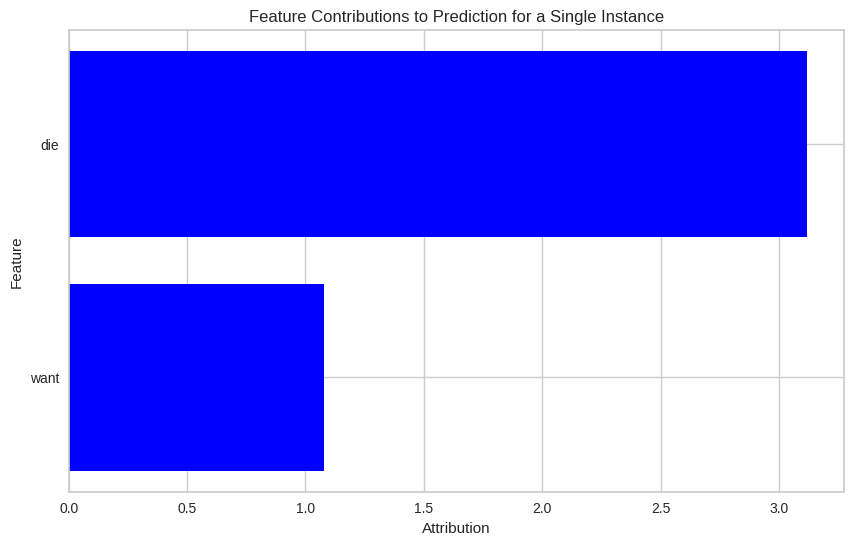

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
#df = pd.read_csv('/mnt/data/twitter-suicidal_data.csv')

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the text column
df['tweet'] = df['tweet'].apply(preprocess_text)

# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['tweet'])
X_val = tfidf_vectorizer.transform(val_data['tweet'])
X_test = tfidf_vectorizer.transform(test_data['tweet'])

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['intention'])
y_val = label_encoder.transform(val_data['intention'])
y_test = label_encoder.transform(test_data['intention'])

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, hidden = self.rnn(x)
        output = self.fc(hidden.squeeze(0))
        return output

# Define hyperparameters
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = len(label_encoder.classes_)

# Instantiate the RNN model
rnn_model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

# Prepare DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    rnn_model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = rnn_model(inputs.unsqueeze(1))  # Add an additional dimension for sequence length
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {total_loss / len(train_loader)}")

# Evaluate the model
with torch.no_grad():
    rnn_model.eval()
    outputs = rnn_model(X_test_tensor.unsqueeze(1))  # Add an additional dimension for sequence length
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Function to interpret RNN model predictions using Integrated Gradients
def interpret_rnn(model, test_input_tensor, y_test_tensor, tfidf_vectorizer, instance_index):
    ig = IntegratedGradients(model)

    # Select and process the single instance
    single_instance = test_input_tensor[instance_index].unsqueeze(0).unsqueeze(1)  # Adjust dimensions as needed
    true_label = y_test_tensor[instance_index].item()

    # Print the instance
    single_instance_2d = single_instance.squeeze().detach().numpy().reshape(1, -1)
    instance_words = tfidf_vectorizer.inverse_transform(single_instance_2d)[0]
    print(f"Instance words: {instance_words}")
    print(f"True label: {true_label}")

    # Ensure the input tensor is of floating point type for gradient computation
    single_instance_float = single_instance.float()
    single_instance_float.requires_grad_()

    # Creating a baseline that is all zeros
    baseline = torch.zeros_like(single_instance_float)

    # Compute attributions using Integrated Gradients
    attr, delta = ig.attribute(single_instance_float, baselines=baseline, target=true_label, return_convergence_delta=True)
    print('Attributions:', attr)
    print('Convergence delta:', delta)

    # Convert attributions to numpy for easier manipulation
    attr_numpy = attr.squeeze().detach().numpy()

    # Get the feature names from the TF-IDF vectorizer
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Map the attributions to the corresponding words
    feature_contributions = [(feature_names[i], attr_numpy[i]) for i in range(len(attr_numpy)) if attr_numpy[i] != 0]

    # Print all features and their attributions
    for feature, value in feature_contributions:
        print(f"{feature}: {value}")

    # Plot all feature contributions for the single instance
    words = [f[0] for f in feature_contributions]
    values = [f[1] for f in feature_contributions]
    plt.figure(figsize=(10, 6))
    plt.barh(words, values, color='blue')
    plt.xlabel('Attribution')
    plt.ylabel('Feature')
    plt.title('Feature Contributions to Prediction for a Single Instance')
    plt.gca().invert_yaxis()
    plt.show()

# Example usage
# Find an instance with label 0
instance_index_label_0 = np.where(y_test_tensor.numpy() == 0)[0][0]
interpret_rnn(rnn_model, X_test_tensor, y_test_tensor, tfidf_vectorizer, instance_index_label_0)

# Find an instance with label 1
instance_index_label_1 = np.where(y_test_tensor.numpy() == 1)[0][0]
interpret_rnn(rnn_model, X_test_tensor, y_test_tensor, tfidf_vectorizer, instance_index_label_1)
